# E-commerce Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv(r"\Users\DELL\OneDrive\Desktop\ecommerce_orders.csv")

In [10]:
print(data.columns)

Index(['order_id', 'order_item_id', 'order_date', 'ship_date', 'order_status',
       'customer_id', 'customer_name', 'gender', 'age', 'country', 'city',
       'sales_channel', 'payment_method', 'product_id', 'product_name',
       'category', 'unit_price', 'quantity', 'discount_pct', 'shipping_cost',
       'revenue', 'profit'],
      dtype='object')


In [12]:
print(data.head)

<bound method NDFrame.head of       order_id  order_item_id  order_date   ship_date order_status  \
0       100001              1  2023-11-28         NaN     Returned   
1       100002              2  2024-03-04  2024-03-05    Completed   
2       100003              3  2024-07-24         NaN     Returned   
3       100004              4  2024-10-16  2024-10-17    Completed   
4       100005              5  2024-08-22         NaN     Returned   
...        ...            ...         ...         ...          ...   
2995    102996           2996  2023-06-20  2023-06-27    Completed   
2996    102997           2997  2023-06-12  2023-06-17    Completed   
2997    102998           2998  2023-08-20  2023-08-23    Completed   
2998    102999           2999  2025-02-25  2025-02-26    Completed   
2999    103000           3000  2024-10-14  2024-10-17    Completed   

      customer_id    customer_name  gender  age country  ... payment_method  \
0             405     Alex Johnson    Male   41  C

# 1) Data Cleaning

In [15]:
data["order_date"] = pd.to_datetime(data["order_date"], errors="coerce")
data["ship_date"] = pd.to_datetime(data["ship_date"], errors="coerce")

In [17]:
numeric_cols = ["unit_price", "quantity", "discount_pct", "shipping_cost", "revenue", "profit", "age"]
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")

data["shipping_cost"] = data["shipping_cost"].fillna(0)
data["total_price"] = data["unit_price"] * data["quantity"]
data["has_discount"] = data["discount_pct"] > 0
data["is_returned"] = data["order_status"].str.lower().str.contains("return")
data["is_completed"] = data["order_status"].str.lower().str.contains("complete")


In [19]:
def age_group(age):
    if age < 18: return "<18"
    elif 18 <= age <= 25: return "18-25"
    elif 26 <= age <= 35: return "26-35"
    elif 36 <= age <= 50: return "36-50"
    else: return "50+"
data["age_group"] = data["age"].apply(age_group)


# 2) Analysis Questions

In [26]:
# 1. Total Sales & Profit
total_revenue = data["revenue"].sum()
total_profit = data["profit"].sum()
print("="*50)
print("1. Total Sales & Profit")
print(f"Total Revenue: {total_revenue:.2f}")
print(f"Total Profit: {total_profit:.2f}")


1. Total Sales & Profit
Total Revenue: 468908.15
Total Profit: 77251.02


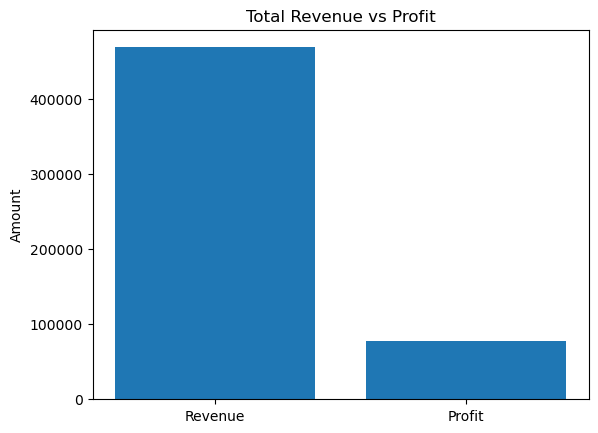

In [28]:
plt.bar(["Revenue", "Profit"], [total_revenue, total_profit])
plt.title("Total Revenue vs Profit")
plt.ylabel("Amount")
plt.show()


In [30]:
# 2. Top-Selling Products
top_products = data.groupby("product_name")["revenue"].sum().sort_values(ascending=False).head(10)
print("="*50)
print("2. Top-Selling Products")
print(top_products)


2. Top-Selling Products
product_name
Laptop           140215.58
Smartphone        93906.53
Tablet            45203.07
Smartwatch        23526.36
Vacuum            22828.65
Microwave         14691.47
Jacket            14574.14
Running Shoes     14378.72
Tennis Racket     12715.14
Headphones        12349.11
Name: revenue, dtype: float64


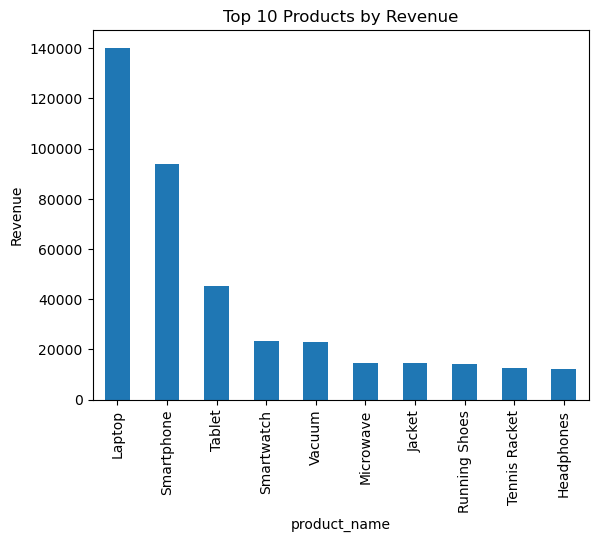

In [32]:
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.show()

In [34]:
# 3. Top 5 Customers
top_customers = data.groupby("customer_name")["revenue"].sum().sort_values(ascending=False).head(5)
print("="*50)
print("3. Top 5 Customers")
print(top_customers)

3. Top 5 Customers
customer_name
Morgan Brown    14979.13
Riley Brown     13683.56
Riley Davis     11387.34
Dana Davis      10967.82
Jordan Jones    10208.14
Name: revenue, dtype: float64


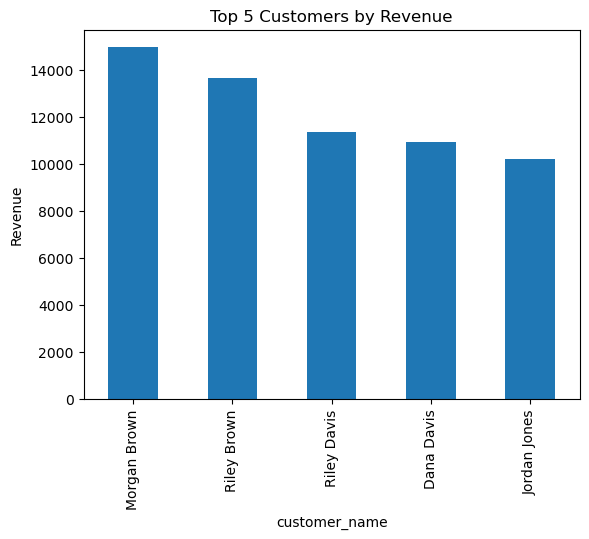

In [36]:
top_customers.plot(kind="bar")
plt.title("Top 5 Customers by Revenue")
plt.ylabel("Revenue")
plt.show()

In [43]:
# 4. Category Performance (Profit Margin)
category_perf = data.groupby("category").agg(
    total_revenue=("revenue","sum"),
    total_profit=("profit","sum")
)
category_perf["profit_margin"] = category_perf["total_profit"] / category_perf["total_revenue"]
category_perf = category_perf.sort_values("profit_margin", ascending=False)
print("="*50)
print("4. Category Performance")
print(category_perf)

4. Category Performance
             total_revenue  total_profit  profit_margin
category                                               
Electronics      315200.65      58348.44       0.185115
Home              53743.32       8214.85       0.152853
Sports            38349.61       5737.78       0.149618
Fashion           41788.45       6132.84       0.146759
Beauty            13264.37        -70.33      -0.005302
Grocery            6561.75      -1112.56      -0.169552


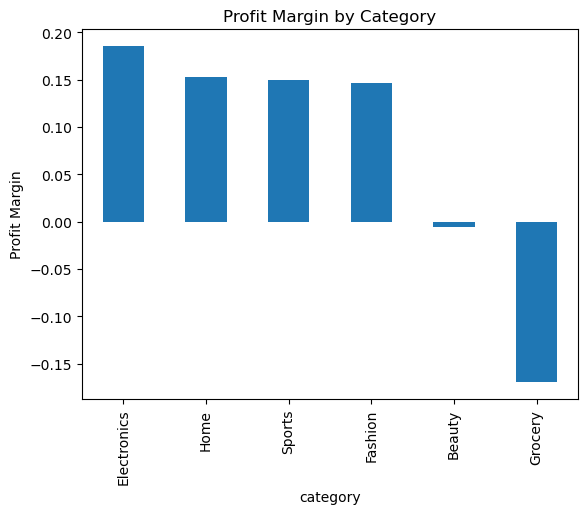

In [45]:
category_perf["profit_margin"].plot(kind="bar")
plt.title("Profit Margin by Category")
plt.ylabel("Profit Margin")
plt.show()

In [47]:
# 5. Country-wise Sales
country_sales = data.groupby("country")["revenue"].sum().sort_values(ascending=False).head(10)
print("="*50)
print("5. Country-wise Sales")
print(country_sales)

5. Country-wise Sales
country
USA        104068.49
Nigeria    103972.24
UK          93753.35
Canada      89291.16
India       77822.91
Name: revenue, dtype: float64


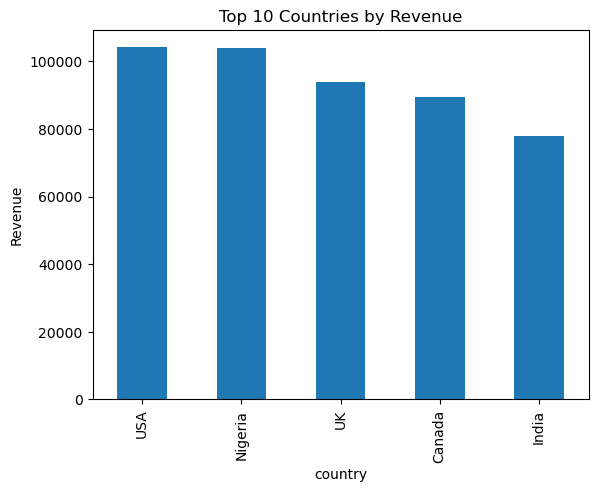

In [49]:
country_sales.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.show()


In [51]:
# 6. Sales Channel Comparison
channel_comp = data.groupby("sales_channel").agg(
    total_revenue=("revenue","sum"),
    total_profit=("profit","sum"),
    orders=("order_id","nunique")
)
print("="*50)
print("6. Sales Channel Comparison")
print(channel_comp)

6. Sales Channel Comparison
               total_revenue  total_profit  orders
sales_channel                                     
Marketplace        112538.26      16272.26     745
Online             283868.62      48956.56    1803
Store               72501.27      12022.20     452


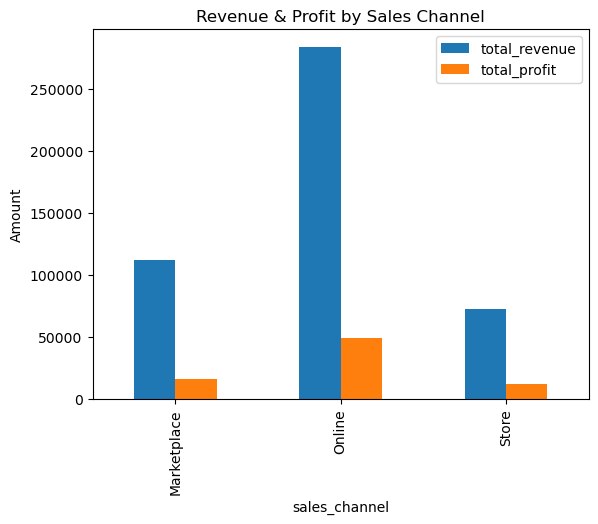

In [53]:
channel_comp[["total_revenue","total_profit"]].plot(kind="bar")
plt.title("Revenue & Profit by Sales Channel")
plt.ylabel("Amount")
plt.show()


In [55]:
# 7. Payment Methods
payment_methods = data["payment_method"].value_counts()
print("="*50)
print("7. Most Used Payment Methods")
print(payment_methods)

7. Most Used Payment Methods
payment_method
Card        1666
Transfer     587
Cash         445
Wallet       302
Name: count, dtype: int64


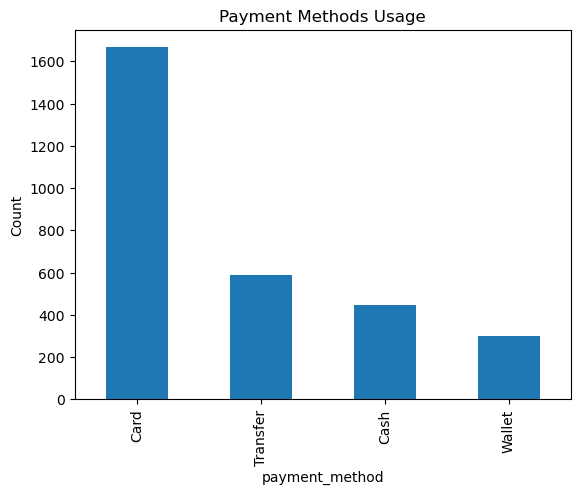

In [57]:
payment_methods.plot(kind="bar")
plt.title("Payment Methods Usage")
plt.ylabel("Count")
plt.show()

In [59]:
# 8. Discount Impact
discount_impact = data.groupby("has_discount")["profit"].agg(["count","mean","sum"])
print("="*50)
print("8. Discount Impact on Profit")
print(discount_impact)

8. Discount Impact on Profit
              count      mean       sum
has_discount                           
True           3000  25.75034  77251.02


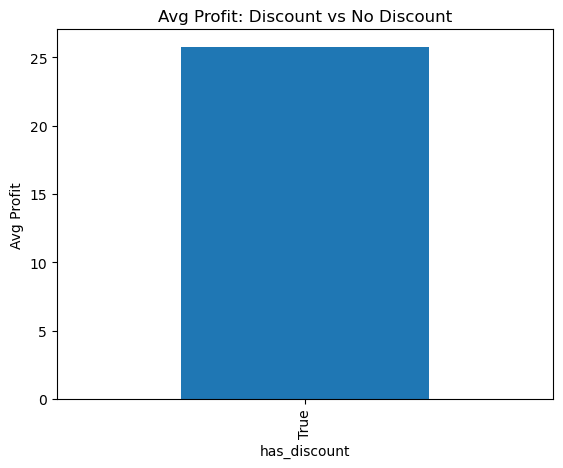

In [61]:
discount_impact["mean"].plot(kind="bar")
plt.title("Avg Profit: Discount vs No Discount")
plt.ylabel("Avg Profit")
plt.show()

In [63]:
# 9. Shipping Analysis
returned_pct = data["is_returned"].mean() * 100
completed_pct = data["is_completed"].mean() * 100
print("="*50)
print("9. Shipping Analysis")
print(f"Returned Orders: {returned_pct:.2f}%")
print(f"Completed Orders: {completed_pct:.2f}%")

9. Shipping Analysis
Returned Orders: 9.90%
Completed Orders: 83.87%


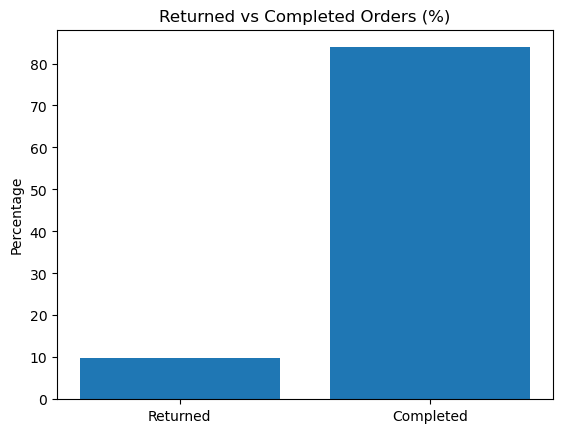

In [65]:
plt.bar(["Returned", "Completed"], [returned_pct, completed_pct])
plt.title("Returned vs Completed Orders (%)")
plt.ylabel("Percentage")
plt.show()


In [67]:
# 10. Age Group Spending
age_spend = data.groupby("age_group")["revenue"].sum().sort_values(ascending=False)
print("="*50)
print("10. Age Group Spending")
print(age_spend)

10. Age Group Spending
age_group
50+      188549.17
36-50    115166.21
26-35    102138.53
18-25     63054.24
Name: revenue, dtype: float64


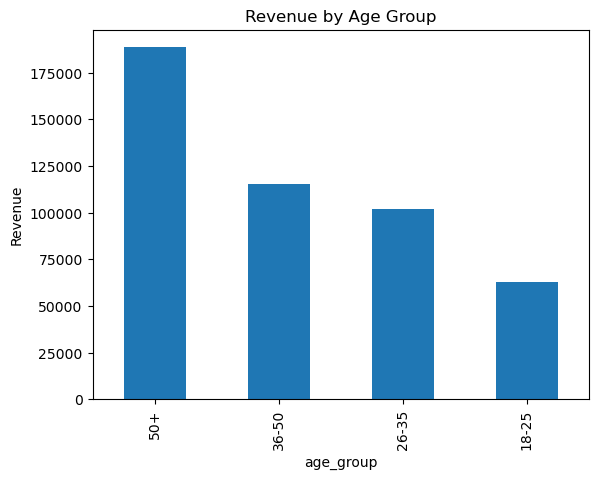

In [69]:
age_spend.plot(kind="bar")
plt.title("Revenue by Age Group")
plt.ylabel("Revenue")
plt.show()